# Project II. Local Feature Match

1. Loads and resizes images  
2. Finds interest points in those images                 (you code this)  
3. Describes each interest point with a local feature    (you code this)  
4. Finds matching features                               (you code this)  
5. Visualizes the matches  
6. Evaluates the matches based on ground truth correspondences  

In [8]:
import csv
import sys
import argparse
import numpy as np

import matplotlib
# matplotlib.use("TkAgg")
import matplotlib.pyplot as plt

from skimage import io, filters, feature, img_as_float32
from skimage.transform import rescale
from skimage.color import rgb2gray

import student
import visualize
from helpers import cheat_interest_points, evaluate_correspondence
from utils import load_data


In [9]:
# You should choose data_pair among [notre_dame, mt_rushmore, e_gaudi]
data_pair = "notre_dame"

In [10]:
# (1) Load in the data
image1, image2, eval_file = load_data(data_pair)

# You don't have to work with grayscale images. Matching with color
# information might be helpful. If you choose to work with RGB images, just
# comment these two lines and make sure scale_factor be changed, too.
image1 = rgb2gray(image1)
image2 = rgb2gray(image2)

# make images smaller to speed up the algorithm. This parameter
# gets passed into the evaluation code, so don't resize the images
# except for changing this parameter - We will evaluate your code using
# scale_factor = 0.5, so be aware of this

scale_factor = 0.5
# scale_factor = [0.5, 0.5, 1]

# Bilinear rescaling
image1 = np.float32(rescale(image1, scale_factor))
image2 = np.float32(rescale(image2, scale_factor))
# width and height of each local feature, in pixels
feature_width = 16


Getting interest points...
376
349


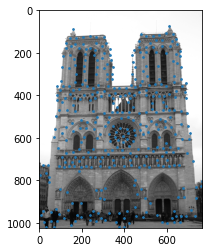

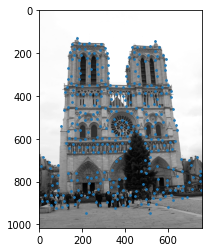

Done!


In [13]:
# (2) Find distinctive points in each image. See Szeliski 4.1.1
# !!! You will need to implement get_interest_points. !!!
print("Getting interest points...")

# For development and debugging get_features and match_features, you will likely
# want to use the ta ground truth points, you can comment out the precedeing two
# lines and uncomment the following line to do this.

# (x1, y1, x2, y2) = cheat_interest_points(eval_file, scale_factor)
c_thr = 0.01
num_thr = 500
(x1, y1) = student.get_interest_points(image1, feature_width, c_thr=c_thr, num_thr=num_thr)
(x2, y2) = student.get_interest_points(image2, feature_width, c_thr=c_thr, num_thr=num_thr)
# (x1, y1) = student.get_interest_points(image1, feature_width)
# (x2, y2) = student.get_interest_points(image2, feature_width)

# if you want to view your corners uncomment these next lines!

plt.imshow(image1, cmap="gray")
plt.scatter(x1, y1, alpha=0.9, s=3)
plt.show()
plt.imshow(image2, cmap="gray")
plt.scatter(x2, y2, alpha=0.9, s=3)
plt.show()
print("Done!")

In [14]:
# 3) Create feature vectors at each interest point. Szeliski 4.1.2
# !!! You will need to implement get_features. !!!

print("Getting features...")
print(image1.shape)
image1_features = student.get_features(image1, x1, y1, feature_width)
image2_features = student.get_features(image2, x2, y2, feature_width)
print("Done!")


Getting features...
(1024, 768)
Done!


In [15]:
# 4) Match features. Szeliski 4.1.3
# !!! You will need to implement match_features !!!

print("Matching features...")
# matches, confidences = student.match_features(image1_features, image2_features)
matches, confidences = student.match_features(image1_features, image2_features, dist_thr=200, ratio_thr=0.97)
print(len(matches.shape))

if len(matches.shape) == 1:
    print("No matches!")
    # return
    raise Exception("No Matches!")

print("Done!")

Matching features...
2
Done!


Matches: 221


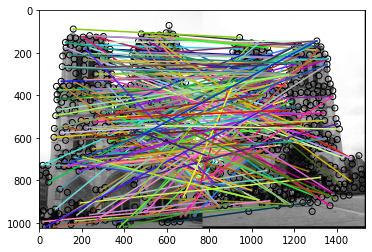

<Figure size 432x288 with 0 Axes>

In [16]:
# 5) Visualization
# You might want to do some preprocessing of your interest points and matches
# before visualizing (e.g. only visualizing 100 interest points). Once you
# start detecting hundreds of interest points, the visualization can become
# crowded. You may also want to threshold based on confidence
# visualize.show_correspondences produces a figure that shows your matches
# overlayed on the image pairs. evaluate_correspondence computes some statistics
# about the quality of your matches, then shows the same figure. If you want to
# just see the figure, you can uncomment the function call to visualize.show_correspondences

num_pts_to_visualize = matches.shape[0]
print("Matches: " + str(num_pts_to_visualize))
visualize.show_correspondences(image1, image2, x1, y1, x2, y2, matches, filename="a" + "_mtches.jpg")

102.0 total good matches, 47 total bad matches.
68.45637583892618% precision
64% accuracy (top 100)
Vizualizing...


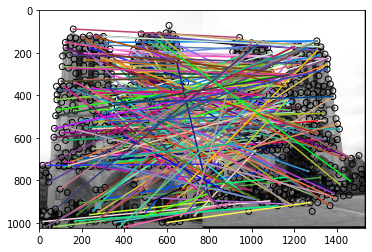

64

In [17]:
## 6) Evaluation
# This evaluation function will only work for the Notre Dame, Episcopal
# Gaudi, and Mount Rushmore image pairs. Comment out this function if you
# are not testing on those image pairs. Only those pairs have ground truth
# available.
#
# It also only evaluates your top 100 matches by the confidences
# that you provide.
#
# Within evaluate_correspondences(), we sort your matches in descending order
#
num_pts_to_evaluate = matches.shape[0]
evaluate_correspondence(image1, image2, eval_file, scale_factor,
    x1, y1, x2, y2, matches, confidences, num_pts_to_visualize)